In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras import losses

import numpy as np
from keras import datasets  # mnist
from keras.utils import np_utils

import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

Using TensorFlow backend.


In [2]:
import numpy as np
import xgboost as xgb
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline
import csv

In [3]:
train = pd.read_csv("C:\\Users\\munan\\Desktop\\contest\\train.csv", index_col=0)
test = pd.read_csv("C:\\Users\\munan\\Desktop\\contest\\test.csv", index_col=0)
submission = pd.read_csv("C:\\Users\\munan\\Desktop\\contest\\sample_submission.csv")

In [4]:
train['class_train'].value_counts()

2    157219
0    119996
1     42785
Name: class_train, dtype: int64

In [5]:
train['class_train'].nunique()

3

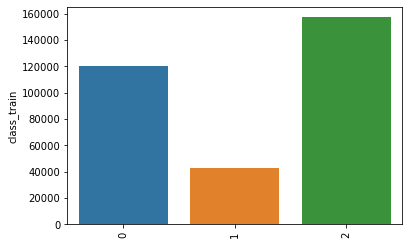

In [6]:
sns.barplot(train['class_train'].value_counts().index,train['class_train'].value_counts())
plt.xticks(rotation=90);

In [9]:
dered_col = [c for c in train.columns if c.find('dered')!=-1]
airmass_col = [c for c in train.columns if c.find('airmass')!=-1]
u_g_r_i_z = list(train.columns[0:5])
redshift_col = [c for c in train.columns if c.find('redshift')!=-1]

In [7]:
def plot_category_hist(data, col_list, category):
    for c in col_list:
        u = np.percentile(data[c],99.5)
        d = np.percentile(data[c],0.05)
        plt.figure(figsize=(5,6))
        for t in data[category].unique():
            sns.distplot(data.query(f'@d < @u and {category} == @t')[c])
        plt.title(c)
        plt.legend(data[category].unique())
        plt.show()

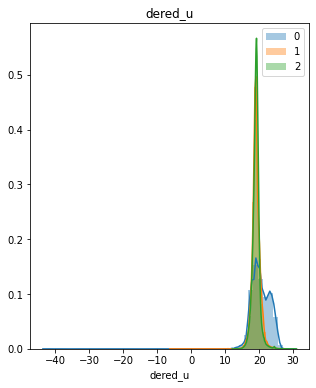

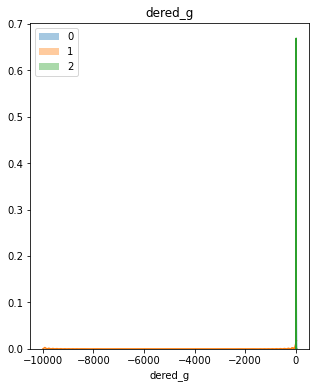

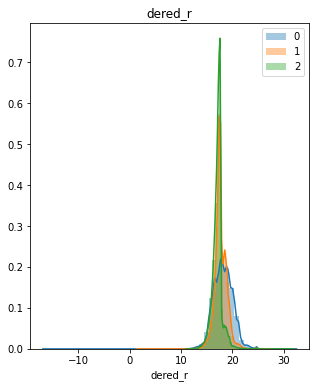

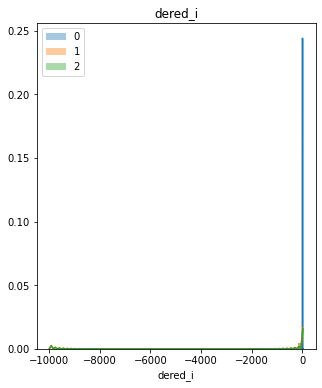

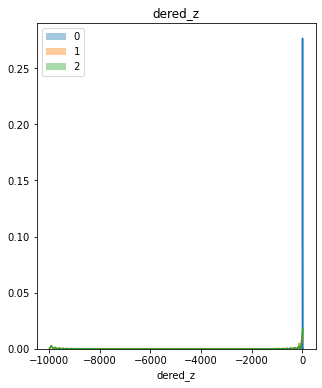

In [10]:
plot_category_hist(train, dered_col,'class_train')